<a href="https://colab.research.google.com/github/Amorovati/Cancer_Prediction/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>It is a self defined project according to what ia have learned in IBM Data Science Specialization course</h3> 


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#dataset
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"

In [ ]:
#downloading and read csv into a dataframe
df=pd.read_csv(path)

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 11)

In [ ]:
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [ ]:
  df.groupby(['Class'])['Class'].value_counts()

Class  Class
2      2        458
4      4        241
Name: Class, dtype: int64

In [ ]:
df['Tumor']=df['Class'].apply(lambda x: 'benign' if x==2 else 'malignant')

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class,Tumor
0,1000025,5,1,1,1,2,1,3,1,1,2,benign
1,1002945,5,4,4,5,7,10,3,2,1,2,benign
2,1015425,3,1,1,1,2,2,3,1,1,2,benign
3,1016277,6,8,8,1,3,4,3,7,1,2,benign
4,1017023,4,1,1,3,2,1,3,1,1,2,benign


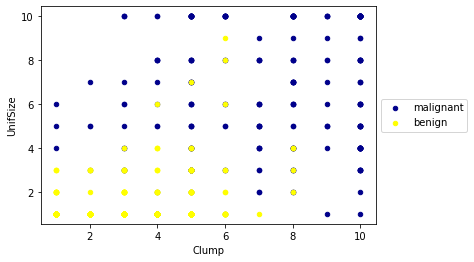

In [ ]:
ax=df[df['Tumor']=='malignant'].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')
df[df['Tumor']=='benign'].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

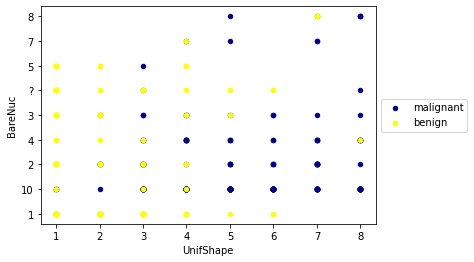

In [ ]:
ax=df[df['Tumor']=='malignant'].plot(kind='scatter', x='UnifShape', y='Mit', color='DarkBlue', label='malignant')
df[df['Tumor']=='benign'].plot(kind='scatter', x='UnifShape', y='BareNuc', color='Yellow', label='benign', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
Tumor          object
dtype: object

In [ ]:
df=df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [ ]:
df['BareNuc']=df['BareNuc'].astype('int')

In [ ]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 2.0 MB/s 
     |████████████████████████████████| 357 kB 34.0 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=bf2ce3e9cf7b00a4c4a3ce0014972bf537f600902b3b5b9700eaa27ef7f4c8f2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
import dash
#import dash_html_components as html
from dash import html
#import dash_core_components as dcc
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
!pip install jupyterlab-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.0 MB/s 
     |████████████████████████████████| 344 kB 49.0 MB/s 
     |████████████████████████████████| 561 kB 53.3 MB/s 
     |████████████████████████████████| 132 kB 51.8 MB/s 
     |████████████████████████████████| 423 kB 58.1 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 561 kB 44.6 MB/s 
     |████████████████████████████████| 70 kB 8.1 MB/s 
     |████████████████████████████████| 271 kB 62.3 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 62.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing 

In [ ]:
from jupyter_dash import JupyterDash

In [ ]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class,Tumor
0,1000025,5,1,1,1,2,1,3,1,1,2,benign
1,1002945,5,4,4,5,7,10,3,2,1,2,benign
2,1015425,3,1,1,1,2,2,3,1,1,2,benign
3,1016277,6,8,8,1,3,4,3,7,1,2,benign
4,1017023,4,1,1,3,2,1,3,1,1,2,benign


In [ ]:

# Create a dash application
app = JupyterDash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('Cancer Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),

                      html.Div([ 
                              html.Div([                   
                                # Add a dropdown list to enable Attributes selection
                                dcc.Dropdown(id='dropdown11',options=[
                                    {'label': 'Clump', 'value': 'Clump'},
                                    {'label': 'UnifSize', 'value': 'UnifSize'},
                                    {'label': 'UnifShape', 'value': 'UnifShape'},
                                    {'label': 'MargAdh', 'value': 'MargAdh'},
                                    {'label': 'SingEpiSize', 'value': 'SingEpiSize'},
                                    {'label': 'BareNuc', 'value': 'BareNuc'},
                                    {'label': 'BlandChrom', 'value': 'BlandChrom'},
                                    {'label': 'NormNucl', 'value': 'NormNucl'},
                                    {'label': 'Mit', 'value': 'Mit'},

                                ],
                                value='Clump',
                                placeholder="Select an Attribute here",
                                searchable=True
                                ),
                                html.Br(),
                              ],style={'width':'50%','margin-right': '2em','margin-left': '2em'}),
                        html.Div([                   
                                # Add a dropdown list to enable Attributes selection
                                dcc.Dropdown(id='dropdown12',options=[
                                    {'label': 'Clump', 'value': 'Clump'},
                                    {'label': 'UnifSize', 'value': 'UnifSize'},
                                    {'label': 'UnifShape', 'value': 'UnifShape'},
                                    {'label': 'MargAdh', 'value': 'MargAdh'},
                                    {'label': 'SingEpiSize', 'value': 'SingEpiSize'},
                                    {'label': 'BareNuc', 'value': 'BareNuc'},
                                    {'label': 'BlandChrom', 'value': 'BlandChrom'},
                                    {'label': 'NormNucl', 'value': 'NormNucl'},
                                    {'label': 'Mit', 'value': 'Mit'}
                                ],
                                value='Clump',
                                placeholder="Select an Attribute here",
                                searchable=True
                                ),
                                html.Br(),
                              ],style={'width':'50%','margin-right': '2em','margin-left': '2em'}),
  ],style=dict(display='flex')),

                          html.Div([ 
                              html.Div([                   
                                # Add a dropdown list to enable Attributes selection
                                dcc.Dropdown(id='dropdown21',options=[
                                    {'label': 'Clump', 'value': 'Clump'},
                                    {'label': 'UnifSize', 'value': 'UnifSize'},
                                    {'label': 'UnifShape', 'value': 'UnifShape'},
                                    {'label': 'MargAdh', 'value': 'MargAdh'},
                                    {'label': 'SingEpiSize', 'value': 'SingEpiSize'},
                                    {'label': 'BareNuc', 'value': 'BareNuc'},
                                    {'label': 'BlandChrom', 'value': 'BlandChrom'},
                                    {'label': 'NormNucl', 'value': 'NormNucl'},
                                    {'label': 'Mit', 'value': 'Mit'},
                                ],
                                value='UnifSize',
                                placeholder="Select an Attribute here",
                                searchable=True
                                ),
                                html.Br(),
                              ],style={'width':'50%','margin-right': '2em','margin-left': '2em'}),
                        html.Div([                   
                                # Add a dropdown list to enable Attributes selection
                                dcc.Dropdown(id='dropdown22',options=[
                                    {'label': 'Clump', 'value': 'Clump'},
                                    {'label': 'UnifSize', 'value': 'UnifSize'},
                                    {'label': 'UnifShape', 'value': 'UnifShape'},
                                    {'label': 'MargAdh', 'value': 'MargAdh'},
                                    {'label': 'SingEpiSize', 'value': 'SingEpiSize'},
                                    {'label': 'BareNuc', 'value': 'BareNuc'},
                                    {'label': 'BlandChrom', 'value': 'BlandChrom'},
                                    {'label': 'NormNucl', 'value': 'NormNucl'},
                                    {'label': 'Mit', 'value': 'Mit'},
                                ],
                                value='UnifSize',
                                placeholder="Select an Attribute here",
                                searchable=True
                                ),
                                html.Br(),
                              ],style={'width':'50%','margin-right': '2em','margin-left': '2em'}),
  ],style=dict(display='flex')),

                                html.P('Distribution of Tumor Types Based on Different Attributes',style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 24}),
                                # two scatter plot
                                html.Div([
                                          html.Div(dcc.Graph(id='scatter1')),
                                          html.Br(),
                                          html.Div(dcc.Graph(id='scatter2')),
                                          html.Br(),
                                ],style=dict(display='flex')),


                                ])

# callback function for `attributes-dropdown` as input, `scatter-plot` as output
@app.callback(Output(component_id='scatter1', component_property='figure'),
              Input(component_id='dropdown11', component_property='value'),
              Input(component_id='dropdown21', component_property='value'))
def get_scatter1(atr1,atr2):
    fig=px.scatter(df, x=atr1, y=atr2, color="Tumor")
    return fig

@app.callback(Output(component_id='scatter2', component_property='figure'),
              Input(component_id='dropdown12', component_property='value'),
              Input(component_id='dropdown22', component_property='value'))
def get_scatter2(atr3,atr4):
    fig=px.scatter(df, x=atr3, y=atr4, color="Tumor")
    return fig
   



#Run the app
if __name__ == '__main__':
    app.run_server(mode='external')
    #app.run_server(mode='external' or 'inline', port = 8050, dev_tools_ui=True, #debug=True,
             # dev_tools_hot_reload =True, threaded=True)

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
Y=df['Class'].to_numpy()
Y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [ ]:
df_features=df[['Clump','UnifSize','UnifShape','MargAdh', 'BareNuc','BlandChrom','NormNucl','Mit']]
df_features.head()

,Clump,UnifSize,UnifShape,MargAdh,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,1,3,1,1
1,5,4,4,5,10,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,4,3,7,1
4,4,1,1,3,1,3,1,1


In [ ]:
df_features.dtypes

Clump         int64
UnifSize      int64
UnifShape     int64
MargAdh       int64
BareNuc       int64
BlandChrom    int64
NormNucl      int64
Mit           int64
dtype: object

In [ ]:
X=df_features

In [ ]:
transform=preprocessing.StandardScaler()

In [ ]:
#Standardize features by removing the mean and scaling to unit variance

#It should be a standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)

X=transform.fit_transform(X)
X

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()


In [ ]:
svmcv=GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm_cv=svmcv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.9817508417508417


In [ ]:
svmacc=svm_cv.score(X_test,Y_test)
svmacc

0.948905109489051

In [ ]:
def plot_confusion_matrix(y,y_predict,title_):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix of '+title_); 
    ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant'])

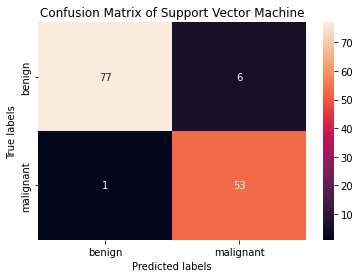

In [ ]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm, 'Support Vector Machine')

In [ ]:
#parameters for logistic regression

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
lr=LogisticRegression()

In [ ]:
grcv=GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv=grcv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9725925925925927


In [ ]:
logregacc=logreg_cv.score(X_test,Y_test)
logregacc

0.948905109489051

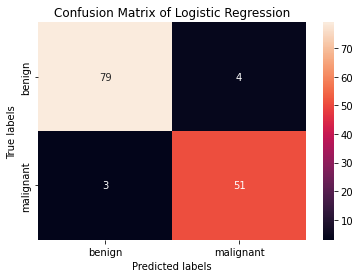

In [ ]:
yhatlr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatlr,'Logistic Regression')

In [ ]:
#Desicion tree

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
dtcv=GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv=dtcv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9762289562289561


In [ ]:
tree_cvacc=tree_cv.score(X_test,Y_test)
tree_cvacc

0.9343065693430657

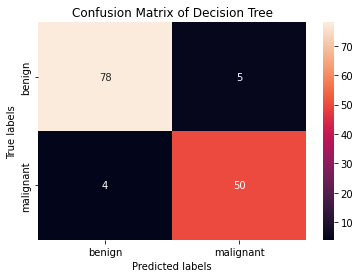

In [ ]:
yhattree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhattree, 'Decision Tree')

In [ ]:
# k nearest neighbors
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knncv=GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv=knncv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2}
accuracy : 0.9744444444444446


In [ ]:
knnacc=knn_cv.score(X_test,Y_test)
knnacc

0.9416058394160584

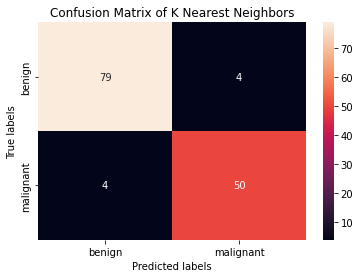

In [ ]:
yhatknn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatknn,'K Nearest Neighbors')

In [ ]:
Modelnames=['logistic regression', 'support vector machine','decision tree', 'k nearest neighbors' ]
accs=[logregacc,svmacc, tree_cvacc, knnacc ]

In [ ]:
accs

[0.948905109489051, 0.948905109489051, 0.9343065693430657, 0.9416058394160584]

In [ ]:
acc={'Model':Modelnames, 'Accuracy': accs}
accdf=pd.DataFrame.from_dict(acc)


In [ ]:
accdf

,Model,Accuracy
0,logistic regression,0.948905
1,support vector machine,0.948905
2,decision tree,0.934307
3,k nearest neighbors,0.941606
